In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import requests

In [11]:
df = pd.read_csv("france_short_rates.csv")
us_df = pd.read_csv("us_short_rates.csv")

In [3]:
df.columns = ["Date", "France"]
us_df.columns = ["Date", "US"]
df["Date"] = pd.to_datetime(df["Date"])
us_df["Date"] = pd.to_datetime(us_df["Date"])


df.set_index("Date", inplace=True)
us_df.set_index("Date", inplace=True)

df = df.join(us_df, how="inner")


df.head()

,France,US
Date,,
1970-01-01,0.1035,0.0891
1970-02-01,0.0986,0.0858
1970-03-01,0.0955,0.0808
1970-04-01,0.0895,0.0751
1970-05-01,0.0902,0.0808


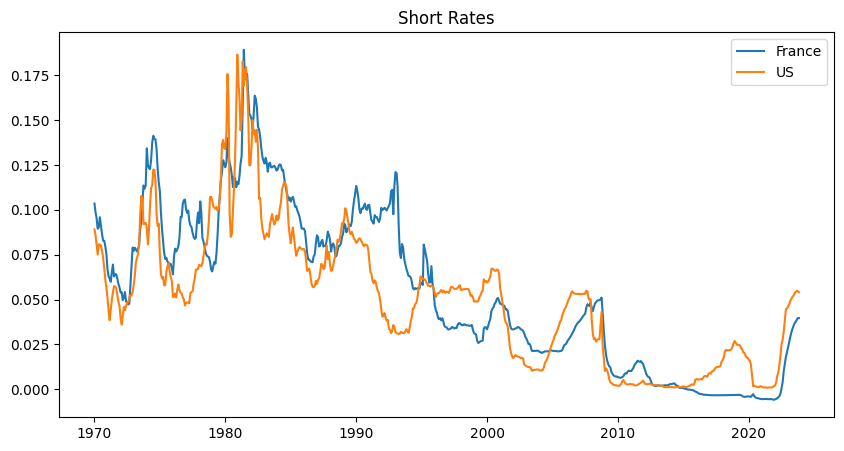

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(df["France"], label="France")
plt.plot(df["US"], label="US")
plt.legend()
plt.title("Short Rates")
plt.show()

# Yield curve

- yield curve
- yield volatility

**For US Treasury bonds**

In [3]:
tickers_US = ['^IRX', '^FVX', '^TNX', '^TYX']  # 3-month, 5-year, 10-year, 30-year
df_US = yf.download(tickers_US, start="2000-01-01", end="2024-01-01")['Adj Close']

# Renaming columns
df_US.columns = ['3-Month', '5-Year', '10-Year', '30-Year']

df_US

[*********************100%%**********************]  4 of 4 completed


,3-Month,5-Year,10-Year,30-Year
Date,,,,
2000-01-03,6.457,5.270,6.548,6.598
2000-01-04,6.396,5.270,6.485,6.532
2000-01-05,6.489,5.270,6.599,6.631
2000-01-06,6.450,5.240,6.549,6.572
2000-01-07,6.397,5.220,6.504,6.537
...,...,...,...,...
2023-12-22,3.879,5.208,3.901,4.054
2023-12-26,3.875,5.203,3.886,4.043
2023-12-27,3.795,5.235,3.789,3.945


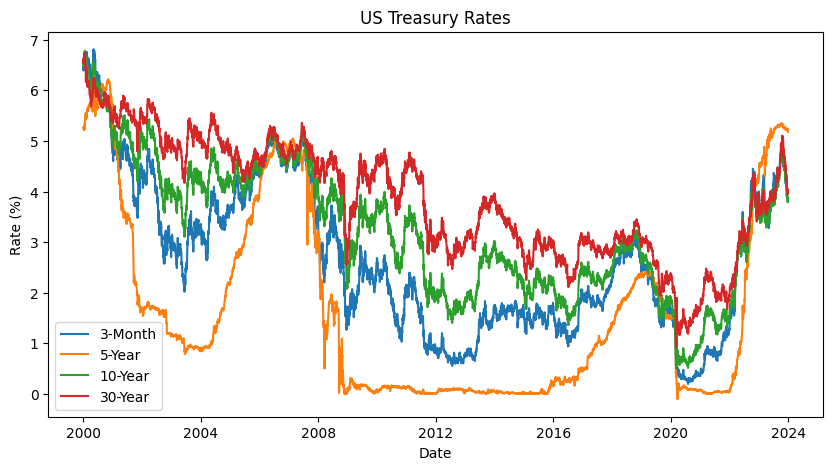

In [4]:
#plotting for the US treasury rates
plt.figure(figsize=(10, 5))
plt.plot(df_US["3-Month"], label="3-Month")
plt.plot(df_US["5-Year"], label="5-Year")
plt.plot(df_US["10-Year"], label="10-Year")
plt.plot(df_US["30-Year"], label="30-Year")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Rate (%)")
plt.title("US Treasury Rates")
plt.show()

**For European Yield Curve:**

In [24]:
df_euro_rates = pd.read_csv("euro_rates.csv", index_col=0, parse_dates=True)
df_euro_rates

,1-Year,5-Year,10-Year,20-Year,30-Year
DATE,,,,,
2004-09-06,2.298838,3.457222,4.209220,4.988680,4.988680
2004-09-07,2.328891,3.479518,4.209626,4.975495,4.975495
2004-09-08,2.346666,3.507894,4.228419,4.978894,4.978894
2004-09-09,2.308988,3.430628,4.161872,4.946545,4.946545
2004-09-10,2.271566,3.374729,4.120981,4.918530,4.918530
...,...,...,...,...,...
2024-02-16,3.298868,2.374727,2.471249,2.569505,2.569505
2024-02-19,3.302677,2.371986,2.471856,2.591528,2.591528
2024-02-20,3.269015,2.334579,2.440981,2.551913,2.551913


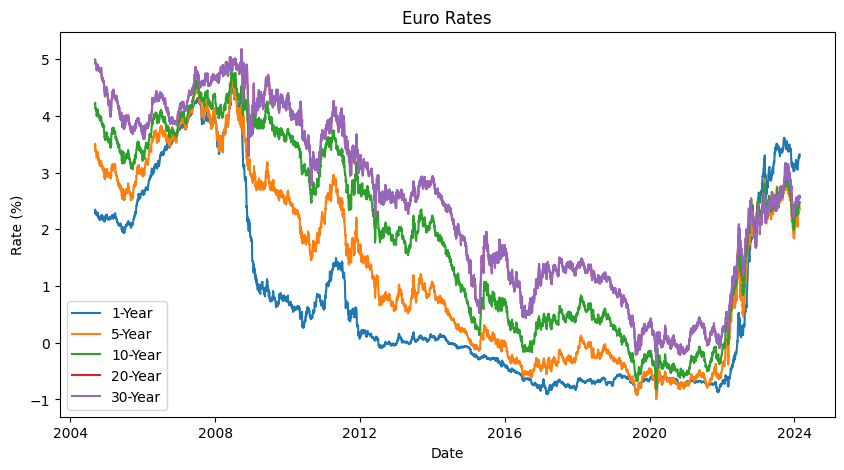

In [26]:
#plotting for the Euro rates
plt.figure(figsize=(10, 5))
plt.plot(df_euro_rates["1-Year"], label="1-Year")
plt.plot(df_euro_rates["5-Year"], label="5-Year")
plt.plot(df_euro_rates["10-Year"], label="10-Year")
plt.plot(df_euro_rates["20-Year"], label="20-Year")
plt.plot(df_euro_rates["30-Year"], label="30-Year")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Rate (%)")
plt.title("Euro Rates")
plt.show()